In [237]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn import svm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
import decimal

# NOTE

The y axis of the confusion matrix represents the prediction result, while the x axis represents the true results.

In [4]:
## read the dataset 

data_dir = 'data'

with open(os.path.join(data_dir, 'divorce.csv')) as clean_data_file:
    data = pd.read_csv(clean_data_file, delimiter=';')

In [116]:
# split the data into train and test sets.

X = data.iloc[:, :-1].to_numpy()
y = data.iloc[:, -1].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=30)

In [240]:
def accuracy_plot(parameters_list, accuracy_list, parameter_name):
    '''
    plot the prediction accuracy as a function of 
    a certian parameter of the model
    '''
    
    plt.figure(figsize = (10,6))
    plt.plot(parameters_list, accuracy_list)
    max_acc = "{:.2f}".format(np.max(accuracy_list))
    plt.axvline(x=parameters_list[np.argmax(accuracy_list)],label = 'maximum accuracy = %s'% max_acc,color='red')
    plt.xlabel(parameter_name,fontsize = 15)
    plt.ylabel('Accuracy',fontsize = 15)
    plt.legend(fontsize = 15,loc='lower right')
    plt.show()
    
    

    

# SVM

SVMs are supervised learning methods used for classification, regression and outlier detection. They have high effieicency when working with high dimentional spaces. They also have high efficiency for memory using, because they only use a subset of traning points in the decision vector.




## Tuning Parameters: Kernel Parameters

The two important parameters, when we train an SVM with the Radial Basis Funtion (rbf) are "c" and "gamma".
The "c" parameter trades off misclassification of training examples against simplicity of the decision surface.In other words, c behaves as a regularization parameter in the SVM. Small "c" will lead to a smooth decision surface, while large "c" try to give every sample a correct classification. The "gamma" parameter can be treated as the inverse of the radius of influence of samples selected by the model as support vectors. When this parameter is small, the influence of a single training sample reach is far, and when this value is large, the effect becomes closer.

It is very important to select a proper values for "c" and "gamma", here we tune this two parameters to see how the test accuracy change.

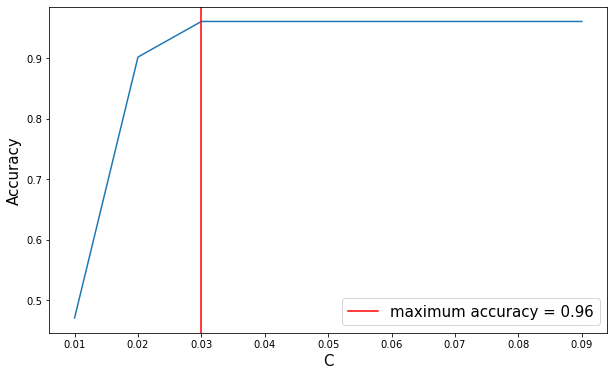

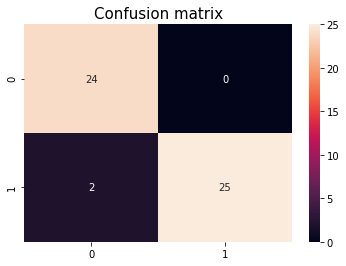

In [266]:
C_range = np.arange(0.01,0.1,1e-2)
svc_rbf_c = []
for C in C_range:
    clf = svm.SVC(C=C)
    clf.fit(X_train,y_train)
    svc_rbf_c.append(np.sum(clf.predict(X_test) == y_test)/len(y_test))

accuracy_plot(C_range, svc_rbf_c, 'C')


best_para = C_range[np.argmax(svc_rbf_c)]
best_svm_model = svm.SVC(C = best_para, random_state=42)
best_svm_model.fit(X_train,y_train)
y_pred = best_svm_model.predict(X_test)

# Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.title('Confusion matrix',fontsize = 15)
sns.heatmap(cf_matrix, annot=True)
plt.show()


## Inerpretation

When parameter C is lower than 0.3, the test accuracy for the model is increasing as C increase. When C is higher than 0.3, the accuracy saturated and reach its maximum value 0.96.

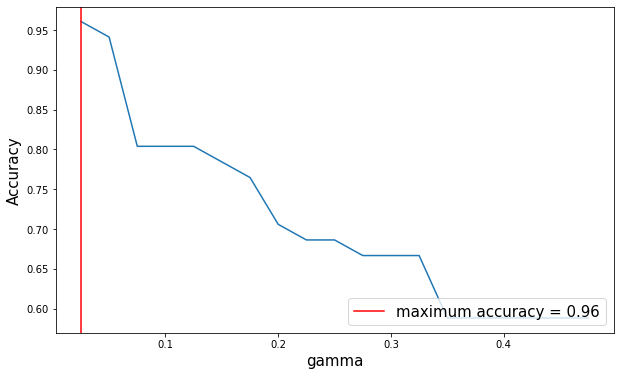

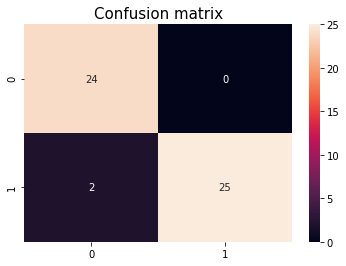

In [267]:

gamma_list = np.arange (1/40,1/2,1/40)
svm_rbf_gamma = []
for i in (gamma_list):
    
    clf = svm.SVC(kernel = "rbf",gamma = i, random_state = 42)
    clf.fit(X_train,y_train)   
    svm_rbf_gamma.append(np.sum(clf.predict(X_test) == y_test)/len(y_test))
    
accuracy_plot(gamma_list, svm_rbf_gamma, 'gamma')


best_para = gamma_list[np.argmax(svm_rbf_gamma)]
best_svm_model = svm.SVC(gamma = best_para, random_state = 42)
best_svm_model.fit(X_train,y_train)
y_pred = best_svm_model.predict(X_test)

# Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.title('Confusion matrix',fontsize = 15)
sns.heatmap(cf_matrix, annot=True)
plt.show()

## Interpretation 

The test accuracy decrease as the value of gamma increases, that is the radius of influence of samples selected by the model as support vectors decreases. When gamma reach 0.35, the accuracy hit the minimum value and remain unchanged in the gamma range we selected.

## Other kernel function for SVC

Here we also try other kernal function for SVC model.

Linear kernel function:

\begin{equation}
\left\langle x, x^{\prime}\right\rangle
\end{equation}

polynomial kernel function:

\begin{equation}
\left(\gamma\left\langle x, x^{\prime}\right\rangle+r\right)^{d}
\end{equation}

sigmoid kernel function:

\begin{equation}
\left(\gamma\left\langle x, x^{\prime}\right\rangle+r\right)
\end{equation}

But only the defaul values are used here.



The accuracy for SVM with linear kernel function is:
0.96


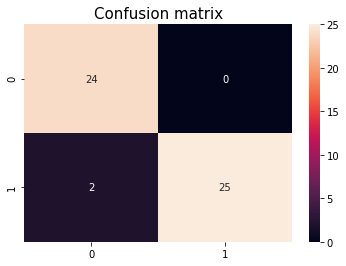

In [279]:
clf = svm.SVC(kernel = "linear", random_state = 42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = "{:.2f}".format(accuracy_score(y_test, y_pred))

print("The accuracy for SVM with linear kernel function is:")
print(accuracy)

#confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.title('Confusion matrix',fontsize = 15)
sns.heatmap(cf_matrix, annot=True)
plt.show()


The accuracy for SVM with polynomial kernel function is:
0.96


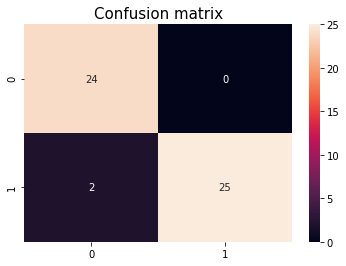

In [278]:
clf = svm.SVC(kernel = 'poly', random_state = 42)
clf.fit(X_train,y_train)   
y_pred = clf.predict(X_test)
accuracy = "{:.2f}".format(accuracy_score(y_test, y_pred))

print("The accuracy for SVM with polynomial kernel function is:")
print(accuracy)

#confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.title('Confusion matrix',fontsize = 15)
sns.heatmap(cf_matrix, annot=True)
plt.show()


The accuracy for SVM with polynomial kernel function is:
0.33


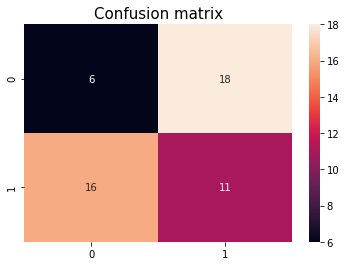

In [280]:
clf = svm.SVC(kernel = "sigmoid", random_state = 42)
clf.fit(X_train,y_train)   
y_pred = clf.predict(X_test)
accuracy = "{:.2f}".format(accuracy_score(y_test, y_pred))

print("The accuracy for SVM with polynomial kernel function is:")
print(accuracy)

#confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.title('Confusion matrix',fontsize = 15)
sns.heatmap(cf_matrix, annot=True)
plt.show()


## Interpretation 

When the kernel function is set to linear or polynomial, the test accuracy for SVM can both reach the maximum accuracy when the kernel function is set to rbf, which is 0.96. However, if we set the kernel function to sigmoid, the model has a very low test accuracy which is only 0.33.

# Random Forest

The random forest improve the predicted accuracy and avoid over-fitting by fitting a number of decision trees on different subsets of the data and averaging the results.

## Tuning Parameters: max_samples

Here we tune the sub sample size by changing the max_samples parameters

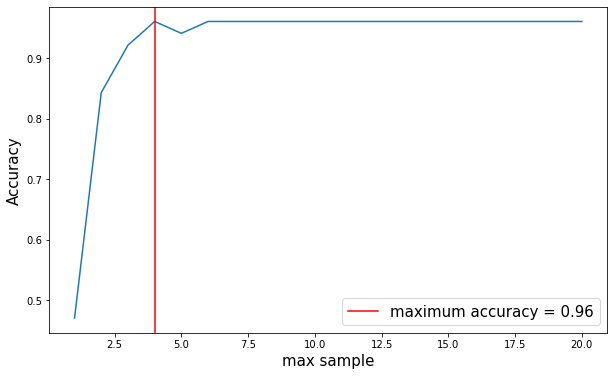

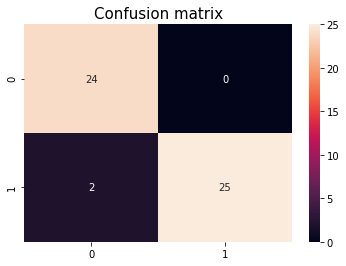

In [284]:
max_samples_par = []
max_sample_range = np.arange (1,21,1)
for i in max_sample_range:
    clf = RandomForestClassifier(max_samples = i,random_state = 42)
    clf.fit(X_train,y_train)
    max_samples_par.append(np.sum(clf.predict(X_test) == y_test)/len(y_test))

accuracy_plot(max_sample_range, max_samples_par, 'max sample')


best_para = max_sample_range[np.argmax(max_samples_par)]
best_rf_model = RandomForestClassifier(max_samples = best_para, random_state=42)
best_rf_model.fit(X_train,y_train)
y_pred = best_rf_model.predict(X_test)

# Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.title('Confusion matrix',fontsize = 15)
sns.heatmap(cf_matrix, annot=True)
plt.show()

## Interpretation

When the maximum size of the sub sample is set to lower than 7, the accuracy will increase with the increase of maximum size of the sub sample. When the maximum size is set to larger than 7, the accracy reaches its saturate value which is 0.96.

## Tuning Parameters: n_estimators

The number of trees in the forest. 

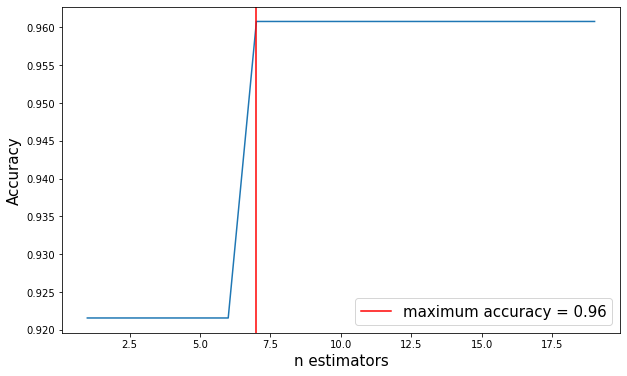

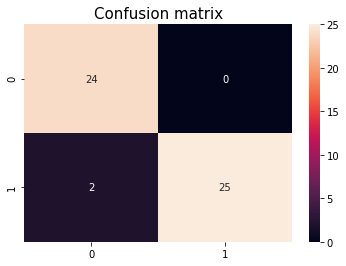

In [288]:
max_n_estimator_par = []
max_n_estimator_range = np.arange (1,20,1)
for i in max_n_estimator_range:
    clf = RandomForestClassifier(n_estimators = i,random_state = 30)
    clf.fit(X_train,y_train)
    max_n_estimator_par.append(np.sum(clf.predict(X_test) == y_test)/len(y_test))

accuracy_plot(max_n_estimator_range, max_n_estimator_par, 'n estimators')


best_para = max_n_estimator_range[np.argmax(max_n_estimator_par)]
best_rf_model = RandomForestClassifier(n_estimators = best_para, random_state = 30)
best_rf_model.fit(X_train,y_train)
y_pred = best_rf_model.predict(X_test)

# Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.title('Confusion matrix',fontsize = 15)
sns.heatmap(cf_matrix, annot=True)
plt.show()

## Interpretation

When the value of n estimators is set to higher than 7, the test accuracy will reach its maximum value, 0.96

# XGBoost

The full name of XGBoost is “eXtreme Gradient Boosting.” The "eXtreme" refers to the improvement of speed. The parallel computing and cache awareness makes XGBoost almost ten times faster than the traditional Gradient Boost. For Gradient Boosting. The trainning samples which do not get good result in the previous models will have higher weight to be selected in the following traning model, which enable the weak learner to be trained into a strong learner.

In [242]:
conda install -c conda-forge xgboost

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [229]:
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

## Tuning parameters: n estimator

We first tune the parameter which controls the number of boost rounds



[16:55:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:55:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:55:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:55:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

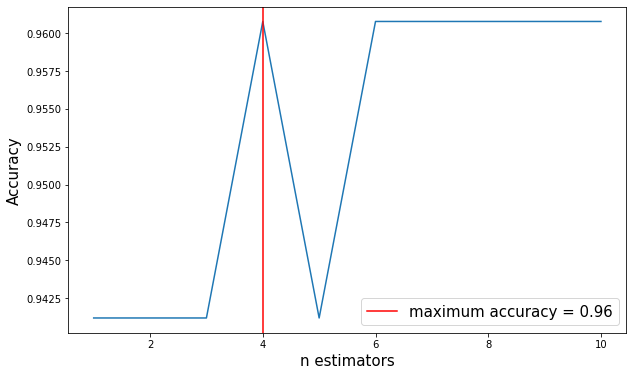

[16:55:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


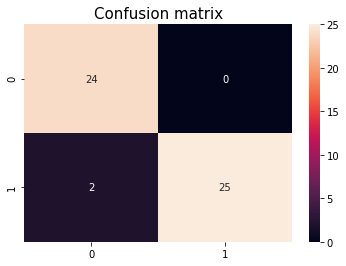

In [253]:
#xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, label_encoder = False)
xgb_n_estimators_acc = []
xgb_n_estimators = np.arange (1,11,1)
for i in (xgb_n_estimators):
    xgb_model = xgb.XGBClassifier(n_estimators = i, random_state=42)
    xgb_model.fit(X_train, y_train)

    y_pred = xgb_model.predict(X_test)

    #print("The confusion matrix "confusion_matrix(y_test, y_pred))
    xgb_n_estimators_acc.append(accuracy_score(y_test, y_pred))

accuracy_plot(xgb_n_estimators, xgb_n_estimators_acc, 'n estimators')

best_para = xgb_n_estimators[np.argmax(xgb_n_estimators_acc)]
best_xgb_model = xgb.XGBClassifier(n_estimators = best_para, random_state=42)
best_xgb_model.fit(X_train,y_train)
y_pred = best_xgb_model.predict(X_test)

# Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.title('Confusion matrix',fontsize = 15)
sns.heatmap(cf_matrix, annot=True)
plt.show()


## Interpretation of result 

We can see from the result by tuning the n estimator parameters, that most of the value of n estimator can give the maximum accuracy prediction of the test data set, except n estimator = 5, will give a slight decrease of the accuracy.

## Tuning parameters

The next parameter we are tuning are the subsample ratio we take from the training data set

[17:13:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:13:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:13:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:13:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

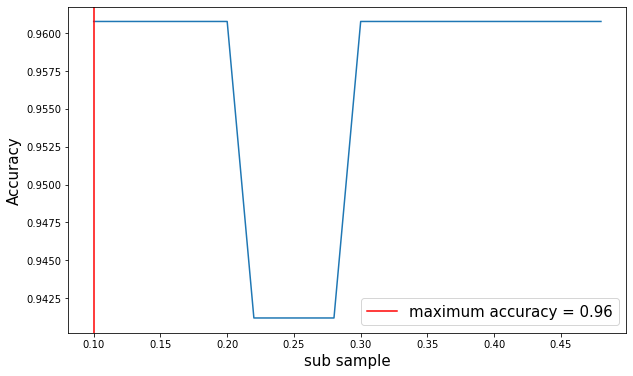

[17:13:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


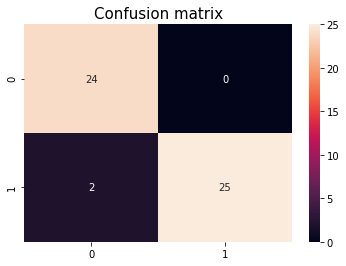

In [264]:
#xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, label_encoder = False)
xgb_subsample_acc= []
xgb_subsample = np.arange (.1,.5,.02)
for i in (xgb_subsample):
    xgb_model = xgb.XGBClassifier(subsample = i, random_state=42)
    xgb_model.fit(X_train, y_train)

    y_pred = xgb_model.predict(X_test)

    #print("The confusion matrix "confusion_matrix(y_test, y_pred))
    xgb_subsample_acc.append(accuracy_score(y_test, y_pred))

accuracy_plot(xgb_subsample, xgb_subsample_acc, 'sub sample')

# visualize the confusion matrix of the best parameter value.
best_para_subsample = xgb_subsample[np.argmax(xgb_subsample_acc)]
best_xgb_model_sub = xgb.XGBClassifier(subsample = best_para_subsample, random_state=42)
best_xgb_model_sub.fit(X_train,y_train)
y_pred = best_xgb_model_sub.predict(X_test)

# Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.title('Confusion matrix',fontsize = 15)
sns.heatmap(cf_matrix, annot=True)
plt.show()


## Interpretation

At the ratio range from 0.22 to 0.28, the accuracy drops to 0.94. The other subsample ratios can give a accuracy of the test data up to 0.96. We believe when the subample ratio are set to be in the range (0.22,0.28), some training samples that are not representaive cause the model to produce low accurate prediction while working with the test data. When the subsample ratio is lower than this range, those samples are not selected, and when the ratio is set higher, those samples take lower weight among the total selected subsamples, which result in higher accuracy of the prediction on the testing set.

# Conclusion

All SVM, Random Forest and XGBoost models manage to have a maximum test accuracy of 0.96 when the parameters are tuning the one that can achieve the best test accuracy. And the confusion matrix of all the models shows that they all mistake in classifying two divoiced couples into non divoiced class.